In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [2]:
exec(open("../../header.py").read())

# Import data

In [3]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [4]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Use class

In [5]:
exec(open("../../header.py").read())

In [6]:
ice = ICE("binary", trace = False)

In [7]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 3 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

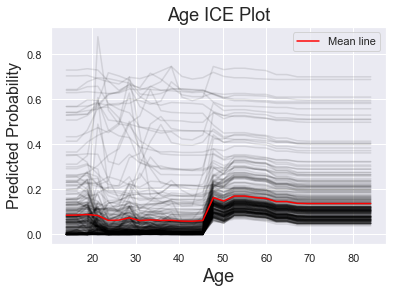

In [8]:
ice.ice_plot_single_feature('Age')

In [10]:
ice.fit(X, rf)

Fit Age in 3 seconds
Fit Number of sexual partners in 3 seconds
Fit First sexual intercourse in 3 seconds
Fit Num of pregnancies in 3 seconds
Fit Smokes in 3 seconds
Fit Smokes (years) in 4 seconds
Fit Smokes (packs/year) in 4 seconds
Fit Hormonal Contraceptives in 5 seconds
Fit Hormonal Contraceptives (years) in 4 seconds
Fit IUD in 3 seconds
Fit IUD (years) in 3 seconds
Fit STDs in 4 seconds
Fit STDs (number) in 4 seconds
Fit STDs:condylomatosis in 3 seconds
Fit STDs:cervical condylomatosis in 4 seconds
Fit STDs:vaginal condylomatosis in 3 seconds
Fit STDs:vulvo-perineal condylomatosis in 3 seconds
Fit STDs:syphilis in 3 seconds
Fit STDs:pelvic inflammatory disease in 3 seconds
Fit STDs:genital herpes in 3 seconds
Fit STDs:molluscum contagiosum in 3 seconds
Fit STDs:AIDS in 3 seconds
Fit STDs:HIV in 3 seconds
Fit STDs:Hepatitis B in 3 seconds
Fit STDs:HPV in 3 seconds
Fit STDs: Number of diagnosis in 3 seconds
Fit STDs: Time since first diagnosis in 4 seconds
Fit STDs: Time since las

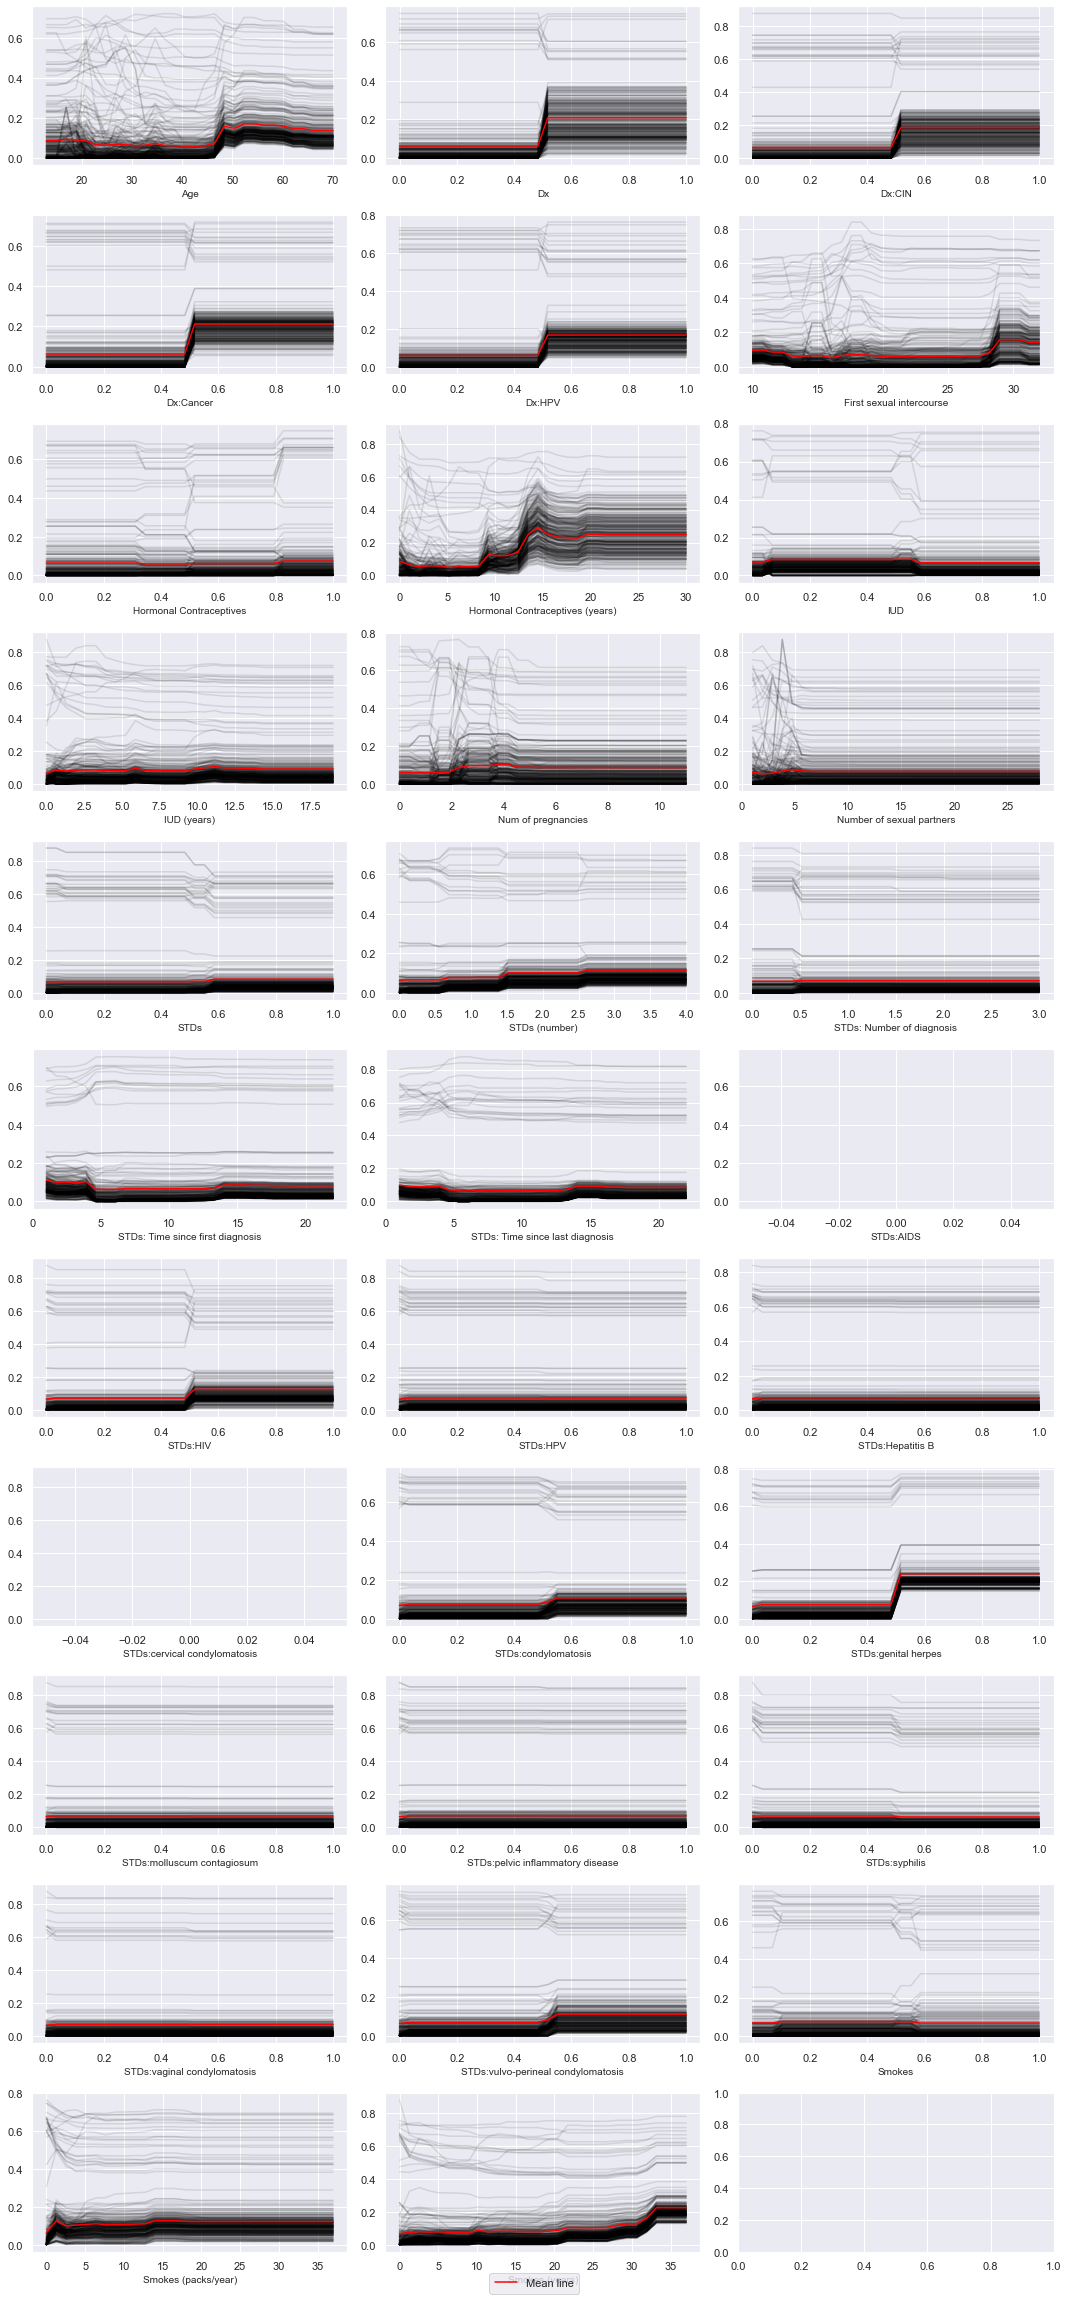

In [11]:
ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))

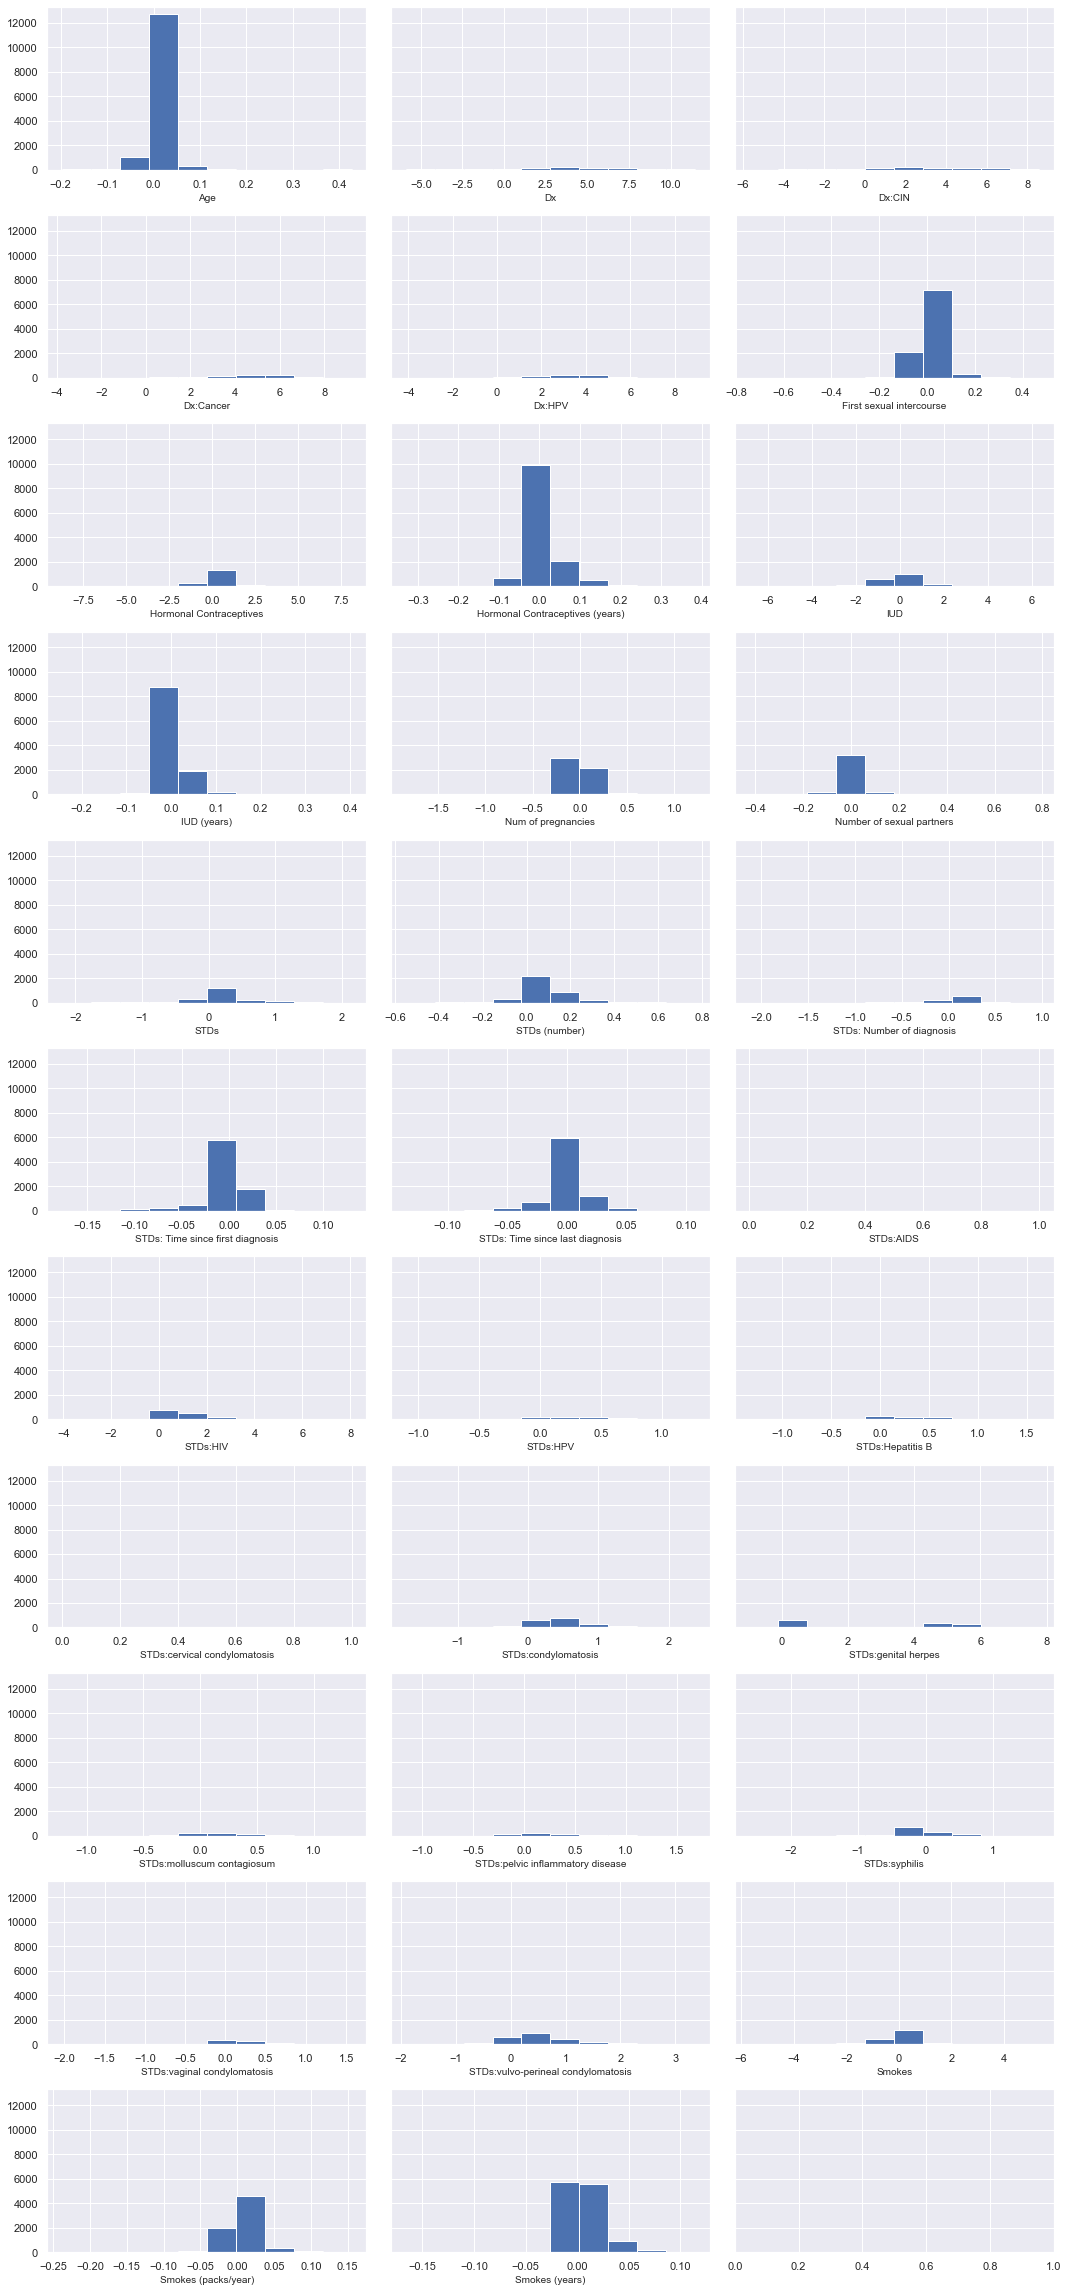

In [12]:
ice.feature_importance_hist(results_root("ice-plot-from-class/all_histograms.pdf"))

In [13]:
ice.feature_importance_table()

,feature,Mean,Mean Abs,St. Dev.,Normalized Mean,Normalized Absolute Mean,Feature Importance
0,Age,0.000886,0.005925,0.015282,0.015079,0.100803,10.331719
1,Dx,0.146501,0.156794,0.963469,0.043725,0.046797,4.796451
2,Dx:CIN,0.121447,0.126718,0.776270,0.036247,0.037821,3.876402
3,Dx:Cancer,0.148415,0.154408,0.879244,0.044297,0.046085,4.723452
4,Dx:HPV,0.107351,0.113881,0.667688,0.032040,0.033989,3.483723
5,First sexual intercourse,0.002035,0.011458,0.033979,0.013365,0.075234,7.711036
6,Hormonal Contraceptives,0.010374,0.039735,0.279087,0.003096,0.011859,1.215530
7,Hormonal Contraceptives (years),0.005382,0.015653,0.033913,0.048189,0.140152,14.364781
8,IUD,-0.003429,0.060912,0.292857,-0.001024,0.018180,1.863361
9,IUD (years),0.001314,0.007465,0.017940,0.007453,0.042333,4.338931
